In [14]:
import pandas as pd
import textstat
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [15]:
xls = pd.ExcelFile('Responses_Reports_Evaluation Overall.xlsx')
df2 = pd.read_excel(xls, '磨玻璃')
df1 = pd.read_excel(xls, '总表')

gpt4 = df1['GPT-4']
gpt35 = df1['GPT-3.5']
copus = df1['CLAUDE-Opus']
csonnet = df1['CLAUDE-Sonnet']
llama = df1['Llama3']

In [32]:
import textstat
def manual_grade(tt):
    if type(tt) != str:
        return tt
    else:
        return textstat.flesch_reading_ease(tt)

In [33]:
def dale_chall_readability_score(text):
  """Calculates the Dale-Chall readability score for a given text.

  Args:
    text: A string containing the text to be analyzed.

  Returns:
    A float representing the Dale-Chall readability score.
  """

  # Load the Dale-Chall word list.
  with open("haha.txt", "r") as f:
    dale_chall_wordlist = set(f.readlines())

  # Count the number of difficult words in the text.
  difficult_word_count = 0
  for word in text.split():
    if word not in dale_chall_wordlist:
      difficult_word_count += 1

  # Calculate the percentage of difficult words.
  difficult_word_percentage = difficult_word_count / len(text.split()) * 100

  # Calculate the raw Dale-Chall readability score.
  raw_score = 0.1579 * difficult_word_percentage + 0.0496 * len(text.split())

  # Adjust the score for texts with more than 5% difficult words.
  adjusted_score = raw_score + 3.6365 if difficult_word_percentage > 5 else raw_score

  return adjusted_score

In [34]:
gpt4_score = gpt4.apply(manual_grade)
gpt35_score = gpt35.apply(manual_grade)
copus_score = copus.apply(manual_grade)
csonnet_score = csonnet.apply(manual_grade)
llama_score = llama.apply(manual_grade)

In [35]:
gpt35_score.unique()

array([12.12, 26.14, 17.27, 27.35, 33.24, 24.48, 15.61, 14.9 , 45.59,
       17.47, 15.1 , 29.18, 33.04, 24.58, 21.94, 18.73, 35.  , 27.62,
       21.74, 40.99, 35.98, 16.02, 24.78, 22.95, 16.12, 26.34, 18.28,
       33.95, 32.83, 20.11, 13.07, 13.99, 30.2 , 20.72, 31.72, 30.33,
       30.26, 40.38, 47.93, 32.73, 33.75, 32.22, 37.64, 29.59,   nan,
       25.32, 17.34, 23.77,  7.05, 29.38, 20.52, 22.48, 21.33, 23.56,
       21.6 , 26.51, 42.82, 18.65, 35.78, 18.96, 25.59, 34.46, 27.42,
       25.08, 21.53, 35.47, 18.35, 26.54, 19.91, 44.85, 12.06, 38.35,
       17.13, 21.02, 32.53, 23.05, 40.48, 32.94, 31.51, 27.15, 34.8 ,
       19.3 , 25.73, 15.04, 12.56, 26.81, 50.46, 35.61, 34.26, 27.96,
       22.55, 28.17, 42.72, 26.95, 43.87, 24.07, 37.84, 28.13, 15.51,
       22.45, 32.43, 28.03, 32.77, 24.31, 42.65, 36.69, 31.92, 28.64,
       23.97, 14.29, 33.54, 25.19, 33.44, 31.01, 21.43, 16.66])

In [36]:
# gpt4_score = gpt4[0].apply(textstat.dale_chall_readability_score)
# gpt35_score = gpt35[0].apply(textstat.dale_chall_readability_score)
# copus_score = copus[0].apply(textstat.dale_chall_readability_score)
# csonnet_score = csonnet[0].apply(textstat.dale_chall_readability_score)
# llama_score = llama[0].apply(textstat.dale_chall_readability_score)

In [37]:
score_df = pd.DataFrame({
    "GPT3.5": gpt35_score,
    "GPT4": gpt4_score,
    "Claude-Sonnet": csonnet_score,
    "Claude-Opus": copus_score,
    "Llama3": llama_score
})
score_df.head()

,GPT3.5,GPT4,Claude-Sonnet,Claude-Opus,Llama3
0,12.12,38.66,30.80,36.63,NaN
1,26.14,39.87,33.34,35.31,NaN
2,17.27,22.14,31.82,41.90,NaN
3,26.14,32.53,15.91,29.99,NaN
4,27.35,29.89,23.56,33.44,NaN


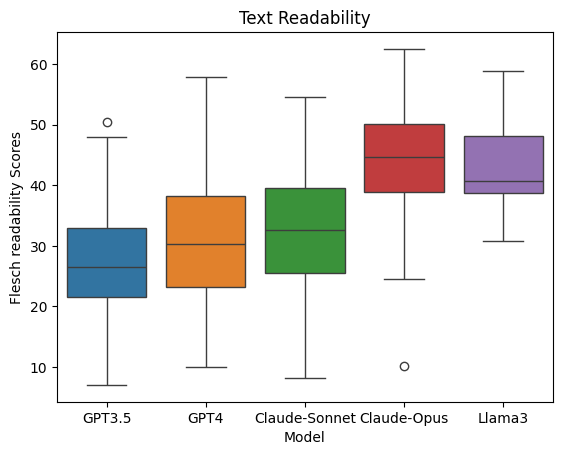

In [42]:
sns.boxplot(data=score_df)
plt.xlabel('Model')
plt.ylabel('Flesch readability Scores') 
plt.title('Text Readability')
plt.show()

In [39]:
# 均值（可以填到原来的表格里）
means = score_df.mean()
pd.DataFrame(means, columns=['Score Mean'])

,Score Mean
GPT3.5,27.245270
GPT4,30.894257
Claude-Sonnet,32.261486
Claude-Opus,44.035338
Llama3,42.331200


In [40]:
# gpt4['Flesch-Score'] = gpt4_score
# gpt35['Flesch-Score'] = gpt35_score
# copus['Flesch-Score'] = copus_score
# csonnet['Flesch-Score'] = csonnet_score
# llama['Flesch-Score'] = llama_score

# gpt4.to_csv('gpt4-editted.csv', index=False)
# gpt35.to_csv('gpt3.5-editted.csv', index=False)
# copus.to_csv('COpus-editted.csv', index=False)
# csonnet.to_csv('CSonnet-editted.csv', index=False)
# llama.to_csv('Llama3-editted.csv', index=False)

In [43]:
score_df.to_csv('readability_scores.csv', index=False)